In [ ]:
# https://drive.google.com/file/d/1p7B3Ecd68CSo7Z1ERnlz1PHOE3Crtrlo/view?usp=sharing -> mammographic_images_mat_features
# https://drive.google.com/file/d/1QOBAgaEexvThOrFMbTIxruLzkXygJESC/view?usp=sharing -> mammographic_images_mat_target

# Import Required Packages

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import seed
import cv2
import tensorflow as tf
import os
import random
from tensorflow import keras
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from six import StringIO

# Import the dataset

In [ ]:
cancer_ds = load_breast_cancer()

cancer_ds

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
cancer_ds.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# create the dataframe

df = pd.DataFrame(data = cancer_ds.data, columns=cancer_ds.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df['target'] = cancer_ds.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 10.0)]

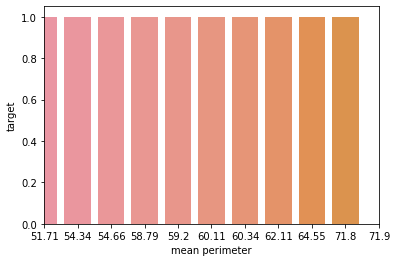

In [ ]:
b_plot = sns.barplot(df.loc[:100, 'mean perimeter'], df.loc[:100, 'target'])
b_plot.set(xlim=(0, 10))

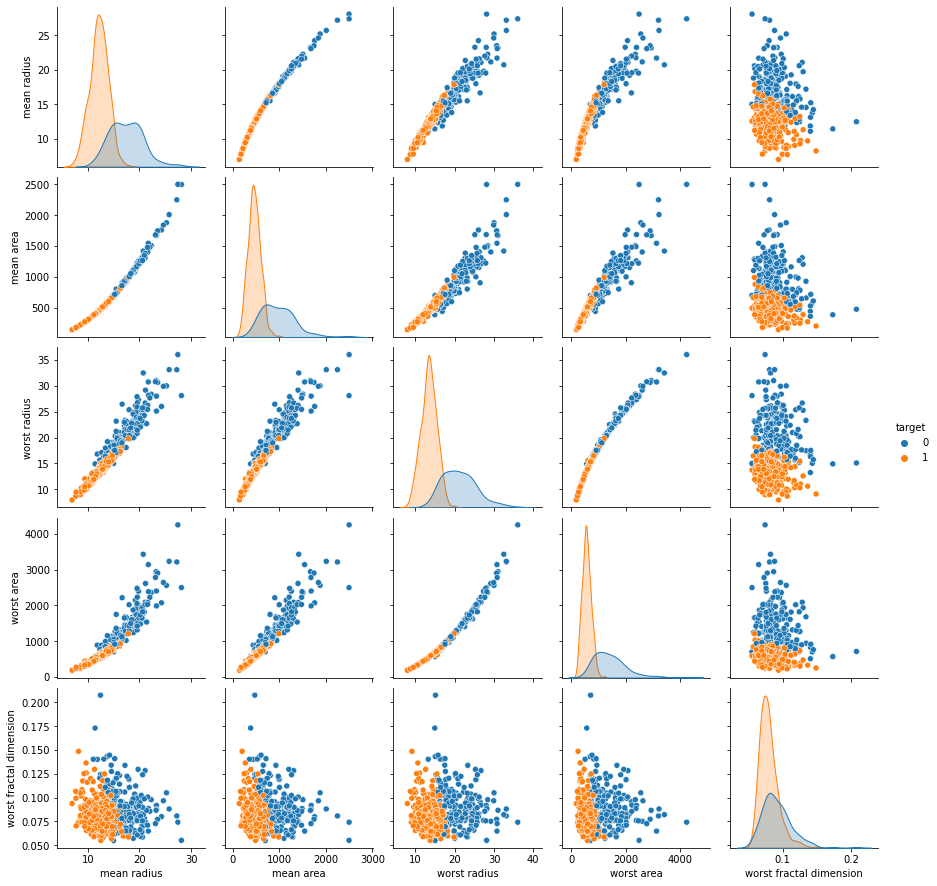

In [ ]:
sns.pairplot(df.loc[:, ['mean radius', 'mean area', 'worst radius', 'worst area', 'worst fractal dimension', 'target']], hue='target')

# Splitting Dataset

In [ ]:
X = df.loc[:, :'worst fractal dimension']
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Decision Tree**

In [ ]:
# datasets are two types -> 
#     1. Discrete
#     2. Continous

# algorithms are mainly two forms,
#     1. Regression for Continous Variables
#     2. Classification for Discrete Variables. Like tree structure.

# all of our hyperplanes are axis-parallel

# Decision tree is a preceptron algorithm

# We fit the boundary for the datas

# Boundary a line by -> w1x1 + w1x2 + b = 0
# w1x1 + w1x2 + b = 0 -> Wx + b = 0; W = (w1, w2), x = (x1, x2); 
# W is a vector of w1, w2 & x is a vector of x1, x2

# now make the decision tree for the X and y
# use sklearn for quick analysis

# we are using criterion as gini and entropy for see the difference

dc_gini_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

In [ ]:
# fit the tree model
dc_gini_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# predict
y_dc_gini_predict = dc_gini_model.predict(X_test)

In [ ]:
print("\nAccuracy : ", accuracy_score(y_test, y_dc_gini_predict), "\n")

# classitifcation_report
print(classification_report(y_test, y_dc_gini_predict))


Accuracy :  0.9122807017543859 

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        44
           1       0.91      0.96      0.93        70

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



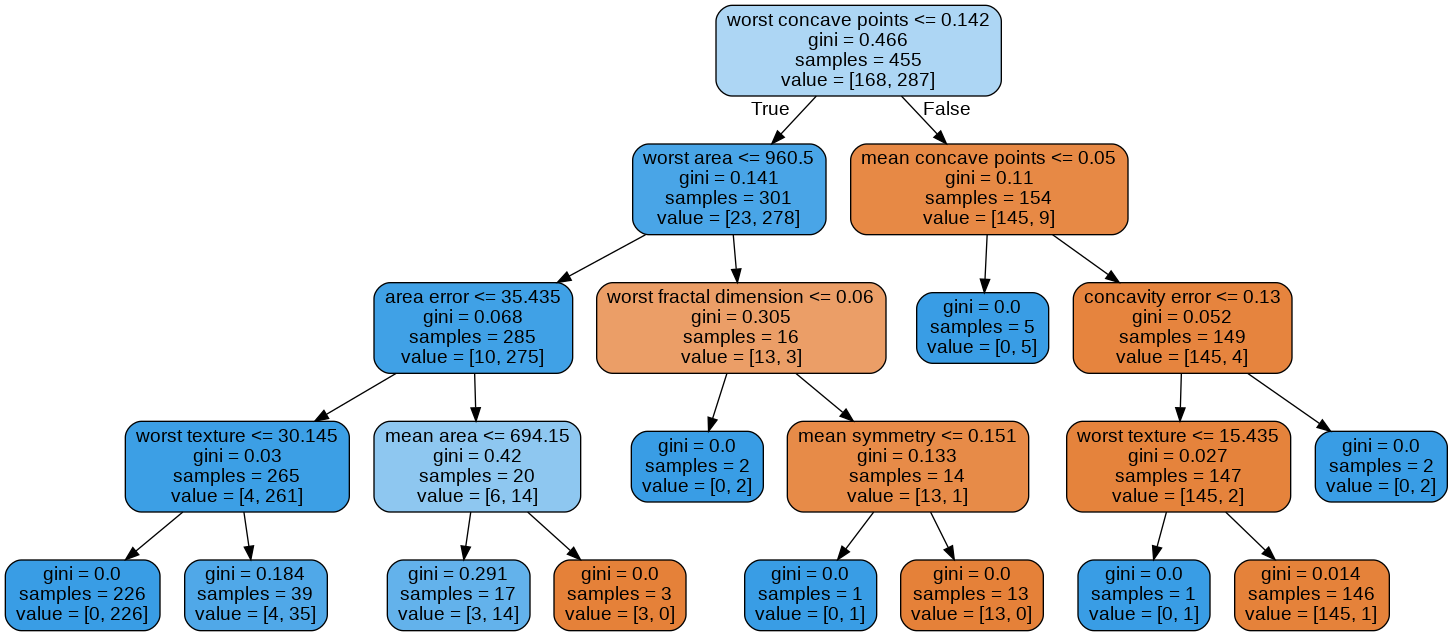

In [ ]:
# visualization of a tree

# for gini

filter_df = df.drop('target', axis=1)

features = list(filter_df.columns)

dot_data = StringIO()  

export_graphviz(dc_gini_model, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())

# **K Nearest Neighbour**
KNN

In [ ]:
# K-NN is a type of classification, where the function is only 
#  approximated locally and all computation is deferred until function evaluation.

# k is a user-defined constant, and an unlabeled vector (a query or test point) is 
#  classified by assigning the label which is most frequent among the k training samples nearest to that query point.

# The k-nearest neighbour classifier can be viewed as assigning the k nearest neighbours a weight 1/k and all others 0 weight.
# This can be generalised to weighted nearest neighbour classifiers.

# K nearest neighbors is a simple algorithm that stores all available cases and 
#  classifies new cases based on a similarity measure (e.g., distance functions).

# A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its 
#  K nearest neighbors measured by a distance function.
# If K = 1, then the case is simply assigned to the class of its nearest neighbor.

# Euclidean distance
# use ED to find the distance of two points

# the Euclidean distance from p to q is the number -> 1D -> d(p,q)=|p-q|, 2D -> d(p,q)= sqrt((q1-p1)^2)+(q2-p2)^2)

# now create the instance of KNN with 4 neighbours

knn_model = KNeighborsClassifier(n_neighbors=4)

In [ ]:
# now train the model

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# now test the model

y_knn_predict = knn_model.predict(X_test)

In [ ]:
# now get the score of the predict values using knn

knn_model.score(X_train, y_train)

0.9472527472527472

In [ ]:
# now get the score of predicted values using metrics accuracy score

print("\n\nKNN Accuracy Score : ", accuracy_score(y_test, y_knn_predict), '\n\n')

print(classification_report(y_test, y_knn_predict))



KNN Accuracy Score :  0.9385964912280702 


              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.93      0.97      0.95        70

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



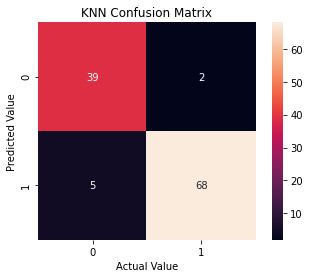

In [ ]:
mat = confusion_matrix(y_test, y_knn_predict)
sns.heatmap(mat.T, square=True, annot=True)
plt.title('KNN Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

# **Artificial Neural Network** (ANN)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [56]:
data_drive_path = '/content/gdrive/My Drive/datasets/originals'

In [57]:
def loadImages(path, subfolder_path):
  image_files = sorted([os.path.join(path, subfolder_path, file) for file in os.listdir(path + '/' + subfolder_path) if file.endswith('.bmp')])
  return image_files

def displayImage(img, title = "Originals"):
  plt.imshow(img, cmap='gray',)
  plt.title(title)
  plt.show()

def resizeImage(width, height, img):
  dim = (width, height)
  return cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

In [58]:
# m -> malignant
# b -> benign

m_path_dataset = loadImages(data_drive_path, 'malignant')
b_path_dataset = loadImages(data_drive_path, 'benign')

In [62]:
m_path_dataset[0]

'/content/gdrive/My Drive/data/originals/malignant/us101.bmp'

In [64]:
m_img_ds = list()
b_img_ds = list()

for i in m_path_dataset:
  img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
  m_img_ds.append(img)

for i in b_path_dataset:
  img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
  b_img_ds.append(img)

In [60]:
m_img_ds[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 53,  54,  57, ...,  85,  62, 143],
       [ 53,  56,  55, ...,  98,  59, 150],
       [ 49,  55,  52, ...,  93,   0,   0]], dtype=uint8)

In [61]:
m_img_ds[0].shape

(113, 137)

In [69]:
processed_m_img_ds = [resizeImage(95, 75, i) for i in m_img_ds]
processed_b_img_ds = [resizeImage(95, 75, i) for i in b_img_ds]

processed_m_img_ds[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 60,  69,  79, ...,  81,  78, 108],
       [ 53,  56,  69, ...,  90,  79, 126],
       [ 51,  54,  59, ...,  97,  68,  33]], dtype=uint8)

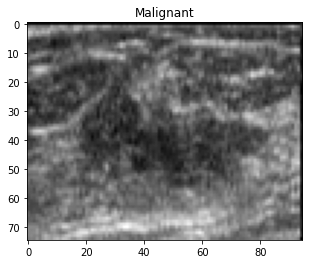

In [70]:
displayImage(processed_m_img_ds[6], 'Malignant')

In [ ]:
X_ann = np.loadtxt(data_drive_path + '/mammographic_images_mat_features.txt')
y_ann = np.loadtxt(data_drive_path + '/mammographic_images_mat_target.txt')

In [ ]:
X_ann.shape

(250, 7125)

In [ ]:
# split the numpy array into train and test

X_ann_train, X_ann_test = X_ann[:200], X_ann[200:]
y_ann_train, y_ann_test = y_ann[:200], y_ann[200:]

In [ ]:
seed(0)
tf.random.set_seed(0)

# create the instance of ANN

ann_model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(7125,), activation='sigmoid')
])

ann_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# train the model

ann_model.fit(X_ann_train, y_ann_train, epochs=5)

Epoch 1/5
7/7 [==============================] - 0s 4ms/step - loss: 129.6601 - accuracy: 0.3229
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: 44.0978 - accuracy: 0.6147
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: 27.3194 - accuracy: 0.7022
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 9.3139 - accuracy: 0.8017
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 4.2187 - accuracy: 0.8737


In [ ]:
# evaluate the model

print('\nANN Accuracy Score : ', ann_model.evaluate(X_ann_test, y_ann_test)[1])

2/2 [==============================] - 0s 6ms/step - loss: 3.2149 - accuracy: 0.8600

ANN Accuracy Score :  0.8600000143051147


In [ ]:
y_ann_predict = ann_model.predict(X_ann_test)

Text(0, 0.5, 'Actual vs Predicted')

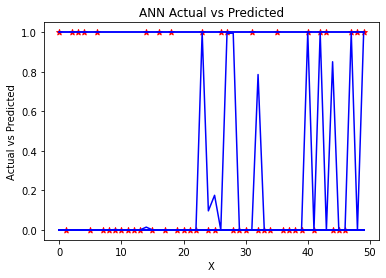

In [ ]:
np_test = np.arange(len(y_ann_test)).reshape((len(y_ann_test), 1))

plt.scatter(np_test, y_ann_test, color='red', marker='*')
plt.plot(np_test, y_ann_predict, color='blue')
plt.title('ANN Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Actual vs Predicted')

# **All Model Accuracy Scores**

In [ ]:
print("\nDecision Tree Accuracy Score : ", accuracy_score(y_test, y_dc_gini_predict), '\n')
print("\nKNN Accuracy Score : ", accuracy_score(y_test, y_knn_predict), '\n')
print("\nANN Accuracy Score : ",  ann_model.evaluate(X_ann_test, y_ann_test)[1], '\n')


Decision Tree Accuracy Score :  0.9122807017543859 


KNN Accuracy Score :  0.9385964912280702 

2/2 [==============================] - 0s 5ms/step - loss: 3.2149 - accuracy: 0.8600

ANN Accuracy Score :  0.8600000143051147 

